<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/conversation/conversation_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Conversation Satisfaction</h1>

**What is Conversation Satisfaction?**: Conversation Satisfaction is a metric that determines how well a model/LLM answers the query asked by the user. It determines the user's satisfaction based on the conversation with the LLM/AI assistant.

It judges the conversation from various aspects. A few of them are listed below:
1. Completeness: All the queries of the user have been answered or not.
2. User's Acceptance: The user is satisfied with the given answers or not.

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description |
| ----------- | ----------- |
| user_persona | The persona/role of the user asking the queries |
| llm_perona | The persona/role of the LLM answering the queries |
| role | The identifier for persona within a conversation |
| content | The user/llm argument in a particular conversation |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).
 

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
satisfactory_chat = [{
    'conversation' : [
        {"role": "patient", "content": "Help"}, 
        {"role": "nurse", "content": "what do you need"}, 
        {"role": "patient", "content": "Having chest pain"}, 
        {"role": "nurse", "content": "please call 102"},
        {"role": "patient", "content": "Thank you nurse"}, 
    ]  
}]

unsatisfactory_chat = [{
    'conversation' : [
        {"role": "patient", "content": "Help"}, 
        {"role": "nurse", "content": "what do you need"}, 
        {"role": "patient", "content": "Having chest pain"}, 
        {"role": "nurse", "content": "Sorry, I am not sure what that means"},
        {"role": "patient", "content": "You don't understand. Do something! I am having severe pain in my chest"}
    ]  
}]

data = satisfactory_chat + unsatisfactory_chat

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, ConversationSatisfaction
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [ConversationSatisfaction(user_persona="patient", llm_persona="nurse")]
)

2024-01-31 17:42:08.187 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res,indent=3))

[
   {
      "conversation": [
         {
            "role": "patient",
            "content": "Help"
         },
         {
            "role": "nurse",
            "content": "what do you need"
         },
         {
            "role": "patient",
            "content": "Having chest pain"
         },
         {
            "role": "nurse",
            "content": "please call 102"
         },
         {
            "role": "patient",
            "content": "Thank you nurse"
         }
      ],
      "score_conversation_satisfaction": 1.0,
      "explanation_conversation_satisfaction": "1. The patient starts the conversation with \"Help\", indicating a sense of urgency or distress.\n2. The nurse responds by asking what the patient needs, showing a willingness to help.\n3. The patient expresses that they are having chest pain, a serious medical concern.\n4. The nurse advises the patient to call 102, indicating a sense of urgency and concern for the patient's well-being.\n5. The patien

## Step 4: Let's look at some of the results 

### Sample with a good conversation

In [5]:
print(json.dumps(res[0],indent=3))

{
   "conversation": [
      {
         "role": "patient",
         "content": "Help"
      },
      {
         "role": "nurse",
         "content": "what do you need"
      },
      {
         "role": "patient",
         "content": "Having chest pain"
      },
      {
         "role": "nurse",
         "content": "please call 102"
      },
      {
         "role": "patient",
         "content": "Thank you nurse"
      }
   ],
   "score_conversation_satisfaction": 1.0,
   "explanation_conversation_satisfaction": "1. The patient starts the conversation with \"Help\", indicating a sense of urgency or distress.\n2. The nurse responds by asking what the patient needs, showing a willingness to help.\n3. The patient expresses that they are having chest pain, a serious medical concern.\n4. The nurse advises the patient to call 102, indicating a sense of urgency and concern for the patient's well-being.\n5. The patient responds with \"Thank you nurse\", indicating gratitude and satisfaction wi

### Sample with a bad conversation

In [6]:
print(json.dumps(res[1],indent=3))

{
   "conversation": [
      {
         "role": "patient",
         "content": "Help"
      },
      {
         "role": "nurse",
         "content": "what do you need"
      },
      {
         "role": "patient",
         "content": "Having chest pain"
      },
      {
         "role": "nurse",
         "content": "Sorry, I am not sure what that means"
      },
      {
         "role": "patient",
         "content": "You don't understand. Do something! I am having severe pain in my chest"
      }
   ],
   "score_conversation_satisfaction": 0.0,
   "explanation_conversation_satisfaction": "1. The patient starts the conversation with a simple \"Help\" which indicates urgency and distress.\n2. The nurse responds by asking what the patient needs, showing willingness to help.\n3. The patient then explains that they are having chest pain, which is a serious medical concern.\n4. The nurse responds by saying they are not sure what that means, which could be perceived as dismissive or unhelpful

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [8]:
from uptrain import APIClient, Settings, ConversationSatisfaction

UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain API key here

uptrain_client = APIClient(
    Settings(
        uptrain_access_token=UPTRAIN_API_KEY, response_format={"type": "json_object"}
    )
)

res = uptrain_client.log_and_evaluate(
    "Sample-conversation-satisfaction",
    data = data, 
    checks =  [ConversationSatisfaction(user_persona="patient", llm_persona="nurse")]
)

print(json.dumps(res, indent=3))

2024-01-31 17:43:05.577 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


[
   {
      "conversation": [
         {
            "role": "patient",
            "content": "Help"
         },
         {
            "role": "nurse",
            "content": "what do you need"
         },
         {
            "role": "patient",
            "content": "Having chest pain"
         },
         {
            "role": "nurse",
            "content": "please call 102"
         },
         {
            "role": "patient",
            "content": "Thank you nurse"
         }
      ],
      "score_conversation_satisfaction": 1.0,
      "explanation_conversation_satisfaction": "1. The patient starts the conversation with \"Help\", indicating urgency or distress.\n2. The nurse responds by asking what the patient needs, showing concern and readiness to help.\n3. The patient mentions having chest pain, a serious medical issue.\n4. The nurse advises the patient to call 102, indicating a sense of urgency and concern for the patient's well-being.\n5. The patient responds with \"Th

### Dashboards: 
Histogram of score vs number of cases with that score

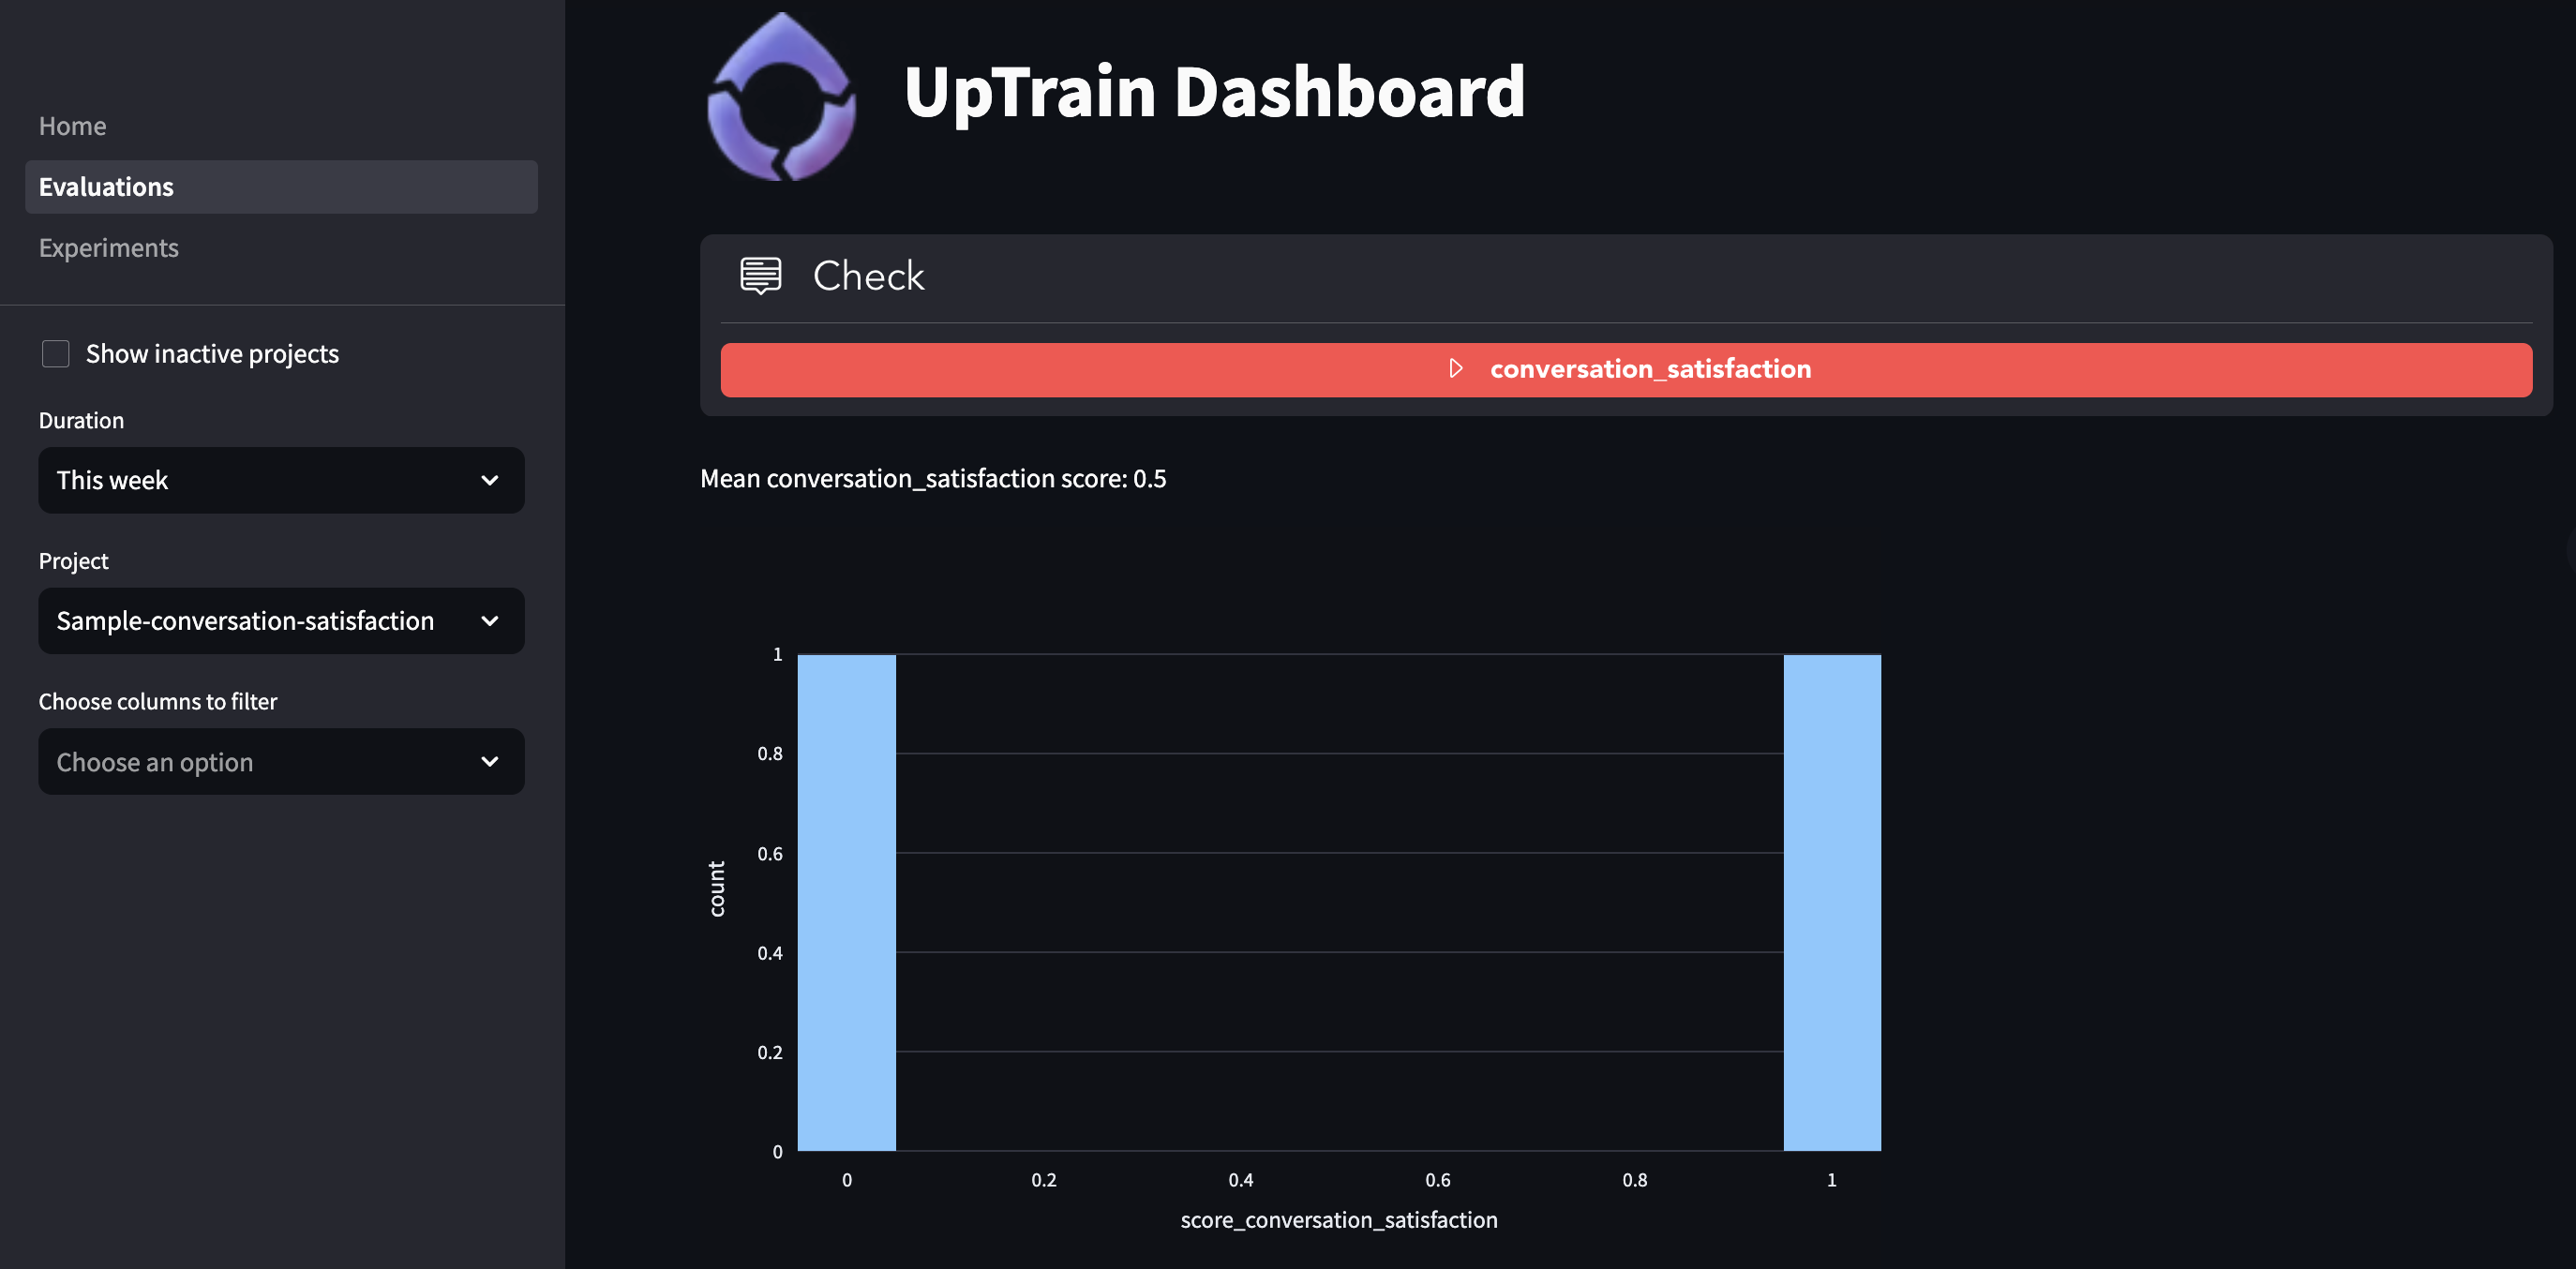

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

